In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps
import warnings

# Suppress specific warning
warnings.filterwarnings("ignore", category=DeprecationWarning)

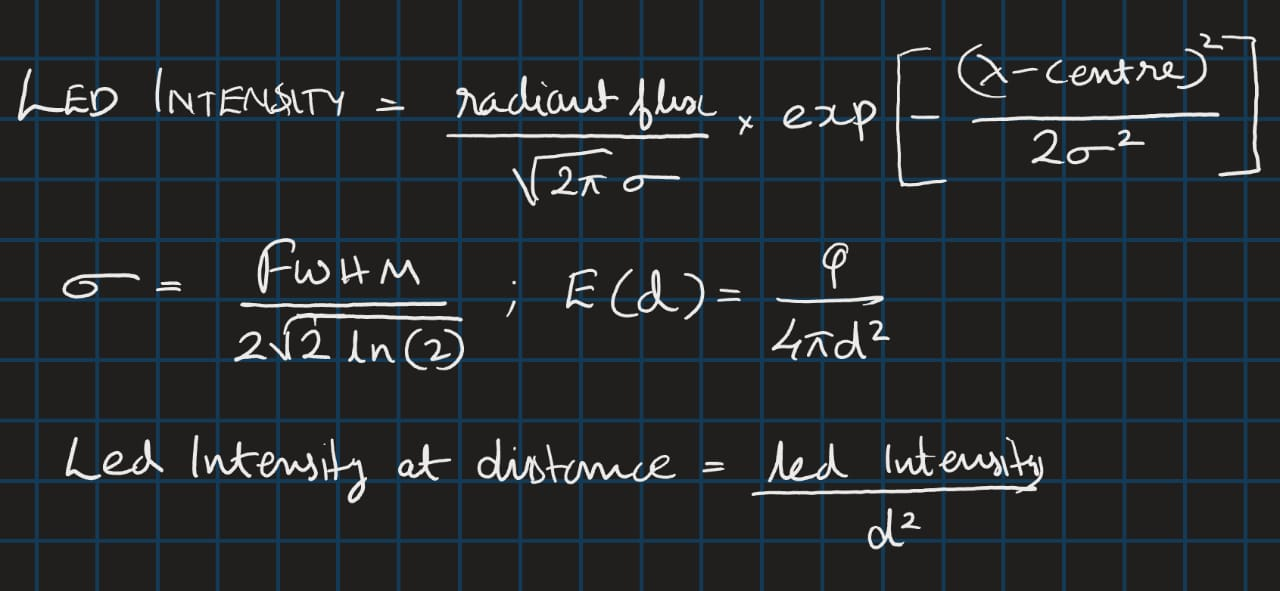

Text(0.5, 1.0, 'intensity/nm')

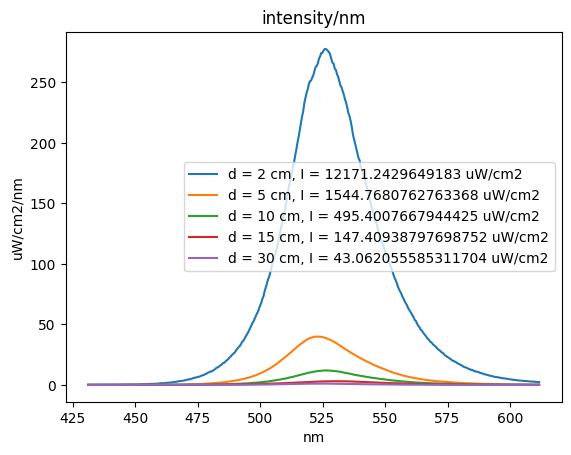

In [2]:
d = [2, 5,10,15,30] #cm

for dval in d:
    # Reading the data from the file
    filename = f"data\\520nm_300mA_{dval}cm_1LED.txt"
    # Initialize a list to store the data
    wavelen = []
    ints_nm = []

    with open(filename, 'r') as file:
        for line in file:
            parts = line.split()
            wavelen.append(float(parts[0]))
            ints_nm.append(float(parts[1]))
    I = simps(ints_nm, wavelen)
    fro = 500
    to = 900
    plt.plot(wavelen[fro:to],ints_nm[fro:to], label = f"d = {dval} cm, I = {I} uW/cm2")
plt.ylabel("uW/cm2/nm")
plt.xlabel("nm")
plt.legend()
plt.title("intensity/nm")

In [3]:
def gaussian(wavelengths, peak_wavelength, sigma):
    gaussian_profile = np.exp(-0.5 * ((wavelengths - peak_wavelength) / sigma) ** 2)
    profile_sum = np.trapz(gaussian_profile, wavelengths)
    return [(gaussian_profile / profile_sum), profile_sum]

In [4]:
peak_wavelength = 520 #nm
fwhm = 34 #nm
radiant_intensity = 83 # mW/sr
total_power = 250 #mW

(calculated) Total Radiated Power at distance 2 mm: 20750.0000 uW/cm2
(measured) Total Radiated Power at distance 2 mm: 12171.2430 uW/cm2
(calculated) Total Radiated Power at distance 5 mm: 3320.0000 uW/cm2
(measured) Total Radiated Power at distance 5 mm: 1544.7681 uW/cm2
(calculated) Total Radiated Power at distance 10 mm: 830.0000 uW/cm2
(measured) Total Radiated Power at distance 10 mm: 495.4008 uW/cm2
(calculated) Total Radiated Power at distance 15 mm: 368.8889 uW/cm2
(measured) Total Radiated Power at distance 15 mm: 147.4094 uW/cm2
(calculated) Total Radiated Power at distance 30 mm: 92.2222 uW/cm2
(measured) Total Radiated Power at distance 30 mm: 43.0621 uW/cm2


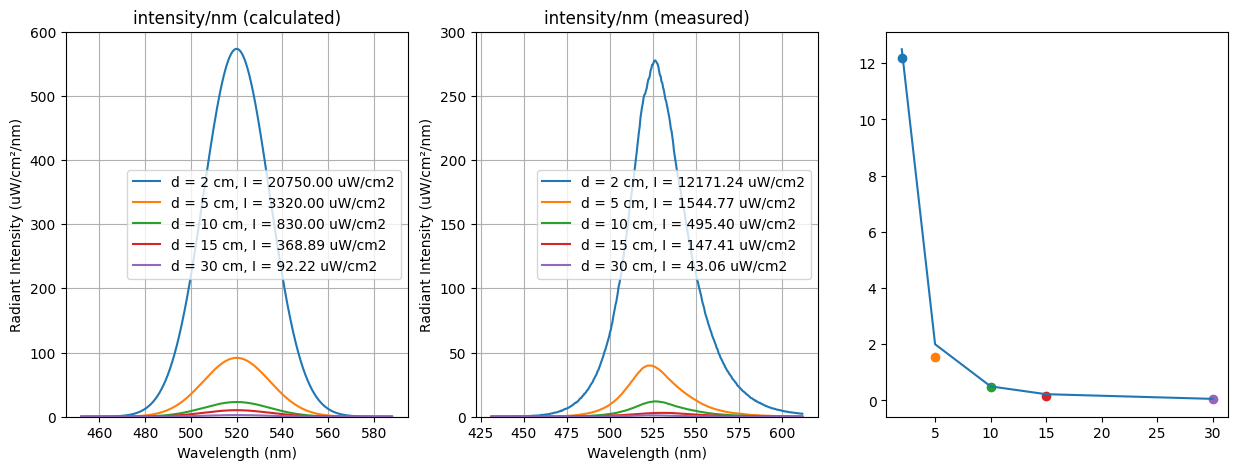

In [6]:
sigma = fwhm / (2 * np.sqrt(2 * np.log(2)))
wavelengths = np.linspace(peak_wavelength - 2 * fwhm, peak_wavelength + 2 * fwhm, 10000)
[intensity_profile, prof_sum] = gaussian(wavelengths, peak_wavelength, sigma)


plt.figure(figsize=[15,5])
for dval in d:
    intensity_at_dist = (radiant_intensity*1000) / (dval**2) #converting from mW/sr to uW/cm2 
    adjusted_intensity_profile = intensity_at_dist * intensity_profile
    
    intensity_peak = max(adjusted_intensity_profile)
    area = np.trapz(adjusted_intensity_profile, wavelengths)
    
    #print(dval, "cm", round(intensity_peak, 2), "uW/cm2/nm")

    
    plt.subplot(1,3,1); plt.plot(wavelengths, adjusted_intensity_profile, label = f"d = {dval} cm, I = {area:.2f} uW/cm2")
    plt.title('intensity/nm (calculated)')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Radiant Intensity (uW/cm²/nm)')
    plt.ylim([0,600])
    plt.legend()
    plt.grid(True)
    
    # Reading the data from the file
    filename = f"data\\520nm_300mA_{dval}cm_1LED.txt"
    # Initialize a list to store the data
    wavelen = []
    ints_nm = []

    with open(filename, 'r') as file:
        for line in file:
            parts = line.split()
            wavelen.append(float(parts[0]))
            ints_nm.append(float(parts[1]))
    I = simps(ints_nm, wavelen)
    fro = 500
    to = 900
    plt.subplot(1,3,2); plt.plot(wavelen[fro:to],ints_nm[fro:to], label = f"d = {dval} cm, I = {I:.2f} uW/cm2")
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Radiant Intensity (uW/cm²/nm)')
    plt.legend()
    plt.ylim([0,300])
    plt.grid('on')
    plt.title("intensity/nm (measured)")

    plt.subplot(1,3,3); plt.scatter(dval, I*1e-3)
    print(f"(calculated) Total Radiated Power at distance {dval} mm: {area:.4f} uW/cm2")
    print(f"(measured) Total Radiated Power at distance {dval} mm: {I:.4f} uW/cm2")
    #print(area/I)

plt.subplot(1,3,3); plt.plot(d, 50/np.array(d)**2)


### Theory checking!
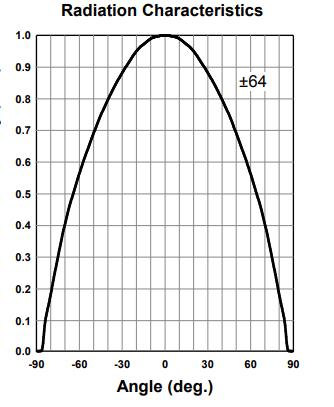

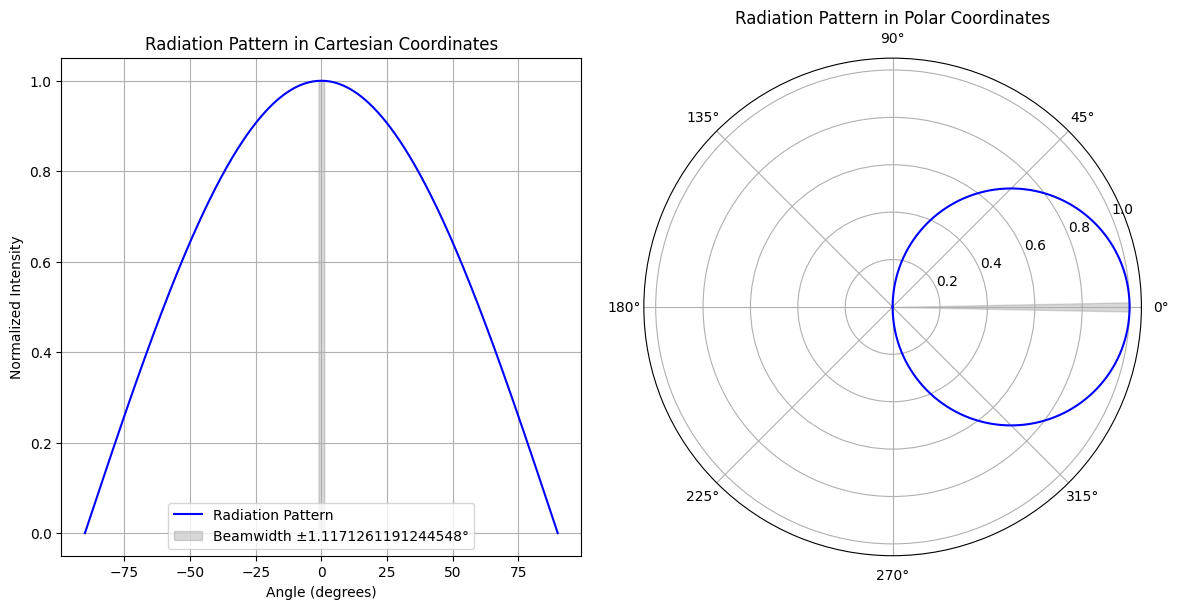

Fraction of power within the beam: 0.0193
Total power within the beam: 4.8304 mW
Area = 0.1194590606527519
Total power per area within the beam: 40.4355 mW/cm2 
Solid angle: 0.0012 steradians
Radiant Intensity (IE): 4043.5453 mW/sr


In [7]:
import numpy as np
import matplotlib.pyplot as plt

#Parameters
#given distance and radius of the sensing unit
d = 10 #cm
r = 0.39/2 #0.39/2 #cm
A = np.pi*r**2 #(np.pi*(d*np.tan(np.deg2rad(32)))**2) #
# steradian
SR = A/d**2
ang = np.rad2deg(np.arctan(r/d))

# Constants
PO = 250  # Total radiated power in mW
theta_half_angle_deg = ang # Half-angle in degrees (from the radiation pattern)
theta_half_angle_rad = np.radians(theta_half_angle_deg)  # Convert to radians

# Generate angle range and normalized radiation pattern (cosine shape as an approximation)
angles = np.linspace(-np.pi / 2, np.pi / 2, 10000)
radiation_pattern = np.cos(angles)

# Calculate the fraction of power within the half-angle ±64°
mask = (angles >= -theta_half_angle_rad) & (angles <= theta_half_angle_rad)
fraction_power_within_beam = np.trapz(radiation_pattern[mask], angles[mask]) / np.trapz(radiation_pattern, angles)
total_power_within_beam = fraction_power_within_beam*PO
total_power_per_area = total_power_within_beam/A

# Calculate the solid angle subtended by the half-angle ±64°
#solid_angle = 2 * np.pi * (1 - np.cos(theta_half_angle_rad))  # Steradians
solid_angle = SR

# Calculate the Radiant Intensity (IE) in mW/sr
IE = (PO * fraction_power_within_beam) / solid_angle

# Plot the normalized radiation pattern
plt.figure(figsize=(12, 6))

# Cartesian plot of the radiation pattern
plt.subplot(1, 2, 1)
plt.plot(np.rad2deg(angles), radiation_pattern, label='Radiation Pattern', color='b')
plt.fill_between(np.rad2deg(angles[mask]), 0, radiation_pattern[mask], color='gray', alpha=0.3, label=f'Beamwidth ±{theta_half_angle_deg}°')
plt.title('Radiation Pattern in Cartesian Coordinates')
plt.xlabel('Angle (degrees)')
plt.ylabel('Normalized Intensity')
plt.grid(True)
plt.legend()

# Polar plot of the radiation pattern
plt.subplot(1, 2, 2, projection='polar')
plt.polar(angles, radiation_pattern, label='Radiation Pattern', color='b')
plt.fill_between(angles[mask], 0, radiation_pattern[mask], color='gray', alpha=0.3, label=f'Beamwidth ±{theta_half_angle_deg}°')
plt.title('Radiation Pattern in Polar Coordinates')

# Display the plots
plt.tight_layout()
plt.savefig("fig3.pdf")
plt.show()

# Output the calculated values
print(f"Fraction of power within the beam: {fraction_power_within_beam:.4f}")
print(f"Total power within the beam: {total_power_within_beam:.4f} mW")
print(f"Area = {A}")
print(f"Total power per area within the beam: {total_power_per_area:.4f} mW/cm2 ")
print(f"Solid angle: {solid_angle:.4f} steradians")
print(f"Radiant Intensity (IE): {IE:.4f} mW/sr")

